In [1]:
from Graph import *
import time

## Vhodni podatki

Vhodne podatke preberemo iz datoteke, ki smo jo naredili s pomočjo nauty traces in ukaza geng -c n.
V repozitoriju se trenutno nahajajo primeri za grafe velikosti 5, 8 in 9.

In [72]:
G = read_graph6("graph_examples/graphs_8.txt")


## Reševanje problema

Reševanja problema se lotimo na 2 načina. Prvi bo poizkušal minimizirati število konfliktov v grafu v polinomskem času. Konflikt je taka povezava $(u,v) \in E(G)$ za katero velja $\omega(u) = \omega(v)$. Drugi način bo vzel *neoznačeno* povezavo $e$ in problem razdelil na $3$ podprobleme, kjer bo v vsakem nastavil utež na tej povezavi na 1, 2 ali 3. 

Graf predstavimo z nekaj dodatnimi podatkovnimi strukturami, ki nam omogočajo laže reševanje konfliktov. To so:
* `edge_weights` : slovar, ki vsaki povezavi dodeli neko utež
* `node_sums` : slovar, ki vsakemu vozlišču dodeli njegovo utež, torej vsoto uteži na incidenčnih povezavah
* `sums` : slovar, ki vsaki  možni vsoti uteži dodeli seznam vozlišč, ki imajo to utež.
* `conflicts` : Množica konfliktinih povezav.
* `history` : Slovar, ki povezavi dodeli neko *označeno* vrednost in vrsti red dodelitve. Označene povezave kasneje ne morejo biti spremenjene.

Na začetku izvajanja nastavimo grafu naključne uteži kar nam omogoča `randomize_weights` funkcija.


### Minimizacija konfliktov:

Naj bo $c = (u, v)$ konflikt. Edini način, da rešimo konflikt $c$ in ohranimo obstoječo utežitev na povezavi $(u,v)$ je s spremembo utežitve na eni izmed naslednjih povezav:
$$E_{c} = (\{u\} \times N(u)) \cup (\{v\} \times N(v)) \setminus \{(u, v)\}$$

Za vsako povezavo $e \in E_c$ spremenimo utež na tej povezavi. Zraven seveda popravimo celotno strukturo grafa, ter zabeležimo število kofliktov pred in po spremembi utežitve. Obravnavamo povezavo, ki najbolj zmanjša skupno ševilo konfliktov. V kolokor je po tej spremembi skupno število strogo manjšo kot pred spremembo, to spremembo tudi izvedemo. Drugače vrnemo false in grafa ne rešujemo naprej.

Možna izboljšava: Trenutno utež popravim na neko vrednost, ki je različna ob obstoječe. Smiselno bi bilo probati obe veljavni spremembi in si zabeležiti rezultate pri obeh.


### Branching (+ local search)

V tem primeru želimo v najslabšem primeru preveriti vse grafe in vrniti false, v kolikor ne obstaja utežitev za ta graf (tak rezultat seveda ni pričakovan in bi pomenil, da domneva ne velja. Vendar trenutno je morda kje še kakšna napaka in bi tak rezultat bil bolj povod za iskanje napake).
Tega se lotimo na naslednji način:
* Nastavimo naključne uteži
* Minimiziramo konflikte z prejšnjim algoritmom.
* V kolikor utežitev ni veljavna, vzamemo povezavo, ki je še nismo označili ter problem razdelimo na 3 podprobleme ter jih rekurzivno rešimo. Vsak podproblem torej zopet najprej minimiziramo oz. poizkušamo rešit z zgornjim algoritmom (minimiziranje morda ni najboljša beseda, saj minimalno število konfliktov še ne pomeni nujno tega, da smo blizu rešitve). 
* Pri reševanju podproblemov z zgornjim algoritmom smo posebaj pozorni na reševanje posameznega konflikta. Naj bo $H$ množica *označenih* povezav, ki smo jih nastavili pred rekurzivnimi klici. V koliko obstaja konflikt $c$ za katerega je $E_c \cap H$ prazna množica, potem ta konflikt ni rešljiv z dosedanjo označitvijo povezav zato lahko to vejo izvajanja zaključimo. To storimo z klicem `UnsolvableConflictException`.



### Rezultati za n = 8

#### Local search

V spodnji celici je napisana zanka, ki poizkuša vsak graf iz seznama G rešiti s pomočjo *local search* algoritma.

11117


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


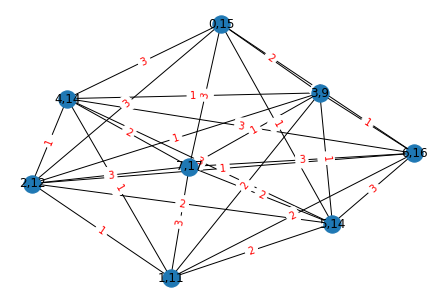

645
2239
It takes 18.14032816886902 seconds to solve it!


In [73]:
l = None
print(len(G))
not_solvable = []
rand = 0
start_time = time.time()
for i in range(len(G)):
    g = Graph(G[i])
    g.randomize_weights()
    if len(g.conflicts) != 0:
        succ = g.solve()
        if succ == False:
            not_solvable.append(i)
            l=g
    else:
        rand += 1
   
l.draw()
print(len(not_solvable))
print(rand)
print('It takes {0} seconds to solve it!'.format(str( time.time() - start_time)))

* **Vseh grafov**: 11117
* **Neuspešno rešenih**: 1251
* **Čas**: 3.4s

#### Branching (+ local search)
Sedaj rešimo še isti nabor grafov, kjer uporabljamo *branching* na uteži na povezavah in v najslabšem primeru pregledamo vse možne utežitve.

In [59]:
l = None
print(len(G))
not_solvable = []
start_time = time.time()
for i in range(len(G)):
    g = Graph(G[i])
    g.randomize_weights()
    if len(g.conflicts) != 0:
        succ = solve_recursive(g)
        if succ == False:
            not_solvable.append(i)
            l=g
           
print(len(not_solvable))
print('It takes {0} seconds to solve it!'.format(str( time.time() - start_time)))

11117
0
It takes 6.282066345214844 seconds to solve it!


* **Vseh grafov**: 11117
* **Neuspešno rešenih**: 0
* **Čas**: 3.6s

## Rezultati (za n=9)

#### Local search

In [7]:
G = read_graph6("graph_examples/graphs_9.txt")

In [8]:
l = None
print(len(G))
not_solvable = []
start_time = time.time()
for i in range(len(G)):
    g = Graph(G[i])
    g.randomize_weights()
    if len(g.conflicts) != 0:
        succ = g.solve()
        if succ == False:
            not_solvable.append(i)
            l=g
           
print(len(not_solvable))
print('It takes {0} seconds to solve it!'.format(str( time.time() - start_time)))

261080
12947
It takes 179.42216634750366 seconds to solve it!


* **Vseh grafov**: 261080
* **Neuspešno rešenih**: 26694
* **Čas**: 100.1s

#### Branching (+ local search)

In [7]:
l = None
print(len(G))
not_solvable = []
start_time = time.time()
for i in range(len(G)):
    g = Graph(G[i])
    g.randomize_weights()
    if len(g.conflicts) != 0:
        succ = solve_recursive(g)
        if succ == False:
            not_solvable.append(i)
            l=g
           
print(len(not_solvable))
print('It takes {0} seconds to solve it!'.format(str( time.time() - start_time)))

261080
0
It takes 122.79545521736145 seconds to solve it!


* **Vseh grafov**: 261080
* **Neuspešno rešenih**: 0
* **Čas**: 108.1s

### Povprečna globina rekurzije

V tem delu si bomo ogledali povprečno globino rekurzije pri različnih tipih hevristike za izbiro povezave pri rekurzivnih klicih.

In [2]:
test_graphs = read_graph6("graph_examples/test_30.txt")
len(test_graphs)

300

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 19, 21, 23, 24, 25, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 51, 52, 53, 54, 55, 56, 59, 60, 61, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92, 93, 96, 98, 99, 100, 101, 102, 103, 104, 108, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 162, 163, 164, 166, 167, 168, 169, 171, 173, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 247, 248, 249, 250, 252, 253, 255, 256, 257, 259, 260, 261, 262, 263, 265, 266, 267, 268,

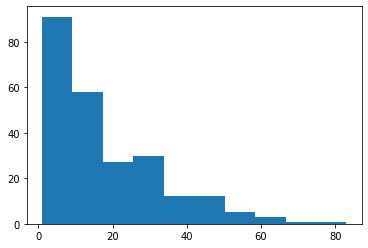

In [5]:
results = []
start_time = time.time()
#rnd.seed(1111)

for i in range(len(test_graphs)):    
    g = Graph(test_graphs[i])
    g.unit_weights(2)
    h = solve_recursive(g, h=1)
    results.append(h)
    
    
depths = []
indeces = []

for r in range(len(results)):
    if(results[r].history):
        depths.append(len(results[r].history))
        indeces.append(r)
        
index_max = max(range(len(depths)), key=depths.__getitem__)
print(indeces)
print(indeces[index_max])
print(depths)
print(len(depths))   
print("Average depth: " + str(sum(depths)/len(depths)))
print("Time: " + str(time.time() - start_time))

plt.hist(depths)
plt.show()

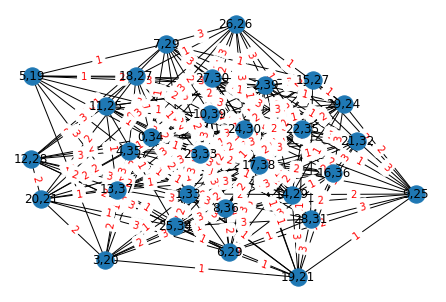

{(3, 5): (2, 0)}


In [86]:
test_g = Graph(test_graphs[113])
test_g.randomize_weights()
h = solve_recursive(g, h=1)
h.draw()
print(h.history)

### Kreiranje grafa direktno iz graph6 formata

V ta namen uporabimo vgrajeno funkcijo v knjižnjici networkx

In [69]:
k = nx.from_graph6_bytes(b'wO??C?C@?`@G@W???H?GW__@?c?A?Q??CG?@?P??P?AC?SC???`?E?eOA@AO???@I??A?a_G??_?C?i@G?C?@@???A?PG??G??ADG??C?Ge??WOG?_CPC@?B?_@O??q?CO`??JC?A?_??CHo?_?CC?@QW?_@??@_@?_?GA?__C?C??CA??c?AOO?@A?_@?DF?_????_GC?H?@AA??A?@A?_?_??GF_l?O??G@???A`?K@??a?E??A??p??@?OgO?E?')
g = Graph(k)

In [72]:
g.randomize_weights()
g.solve()
print(g.conflicts)

set()
